# 这是分析现有案例得到的结果
确实代码都是一模一样，但对整个流程的理解大有裨益！

In [2]:
# 导入所用的包
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [3]:
# 导入经典鸢尾花数据
iris = load_iris()

In [4]:
# 打印数据的描述部分
print(iris.DESCR)
# 得到信息：150组数据，4个特征维度，3个种类维度
# 共150*4 + 150 个数据

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# 打印数据，可直观观察到data 和 target数组
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [31]:
# 定义变量 X y
X = iris.data
y = iris.target

In [32]:
# 划分50个元素
X[0:50, 0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

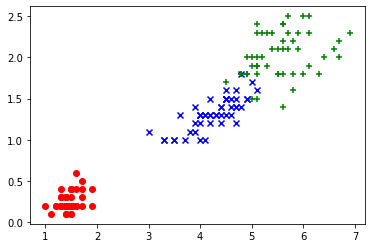

In [51]:
# 运用matplotlib 画出关于2个特征的散点图
# 通过更改feature 和 feature_other 的值改变作图的两个特征
feature = 2
feature_other = 3

plt.scatter(X[0:50, feature], X[0:50, feature_other], color='red' , marker='o' , label='setosa')# 前50个，即1类
plt.scatter(X[50:100, feature], X[50:100, feature_other] , color='blue' , marker='x' , label='versicolor')# 中50个，即2类
plt.scatter(X[100:150, feature], X[100:150, feature_other] , color='green' , marker='+' , label='Virginica')# 后50个，即3类

通过更改feature的值，多次尝试后得到：当feature为2，3时，最具有线性结构，也就是能使用线性逻辑对其分类

In [53]:
# 导入现有的线性分类模型
model = linear_model.LogisticRegression(C=100.0)
model.fit(X,y)

C:\Apps\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100.0)

In [58]:
print(model.coef_)
print(model.intercept_)
y_hat = model.predict(X)

print("精准度=",accuracy_score(y,y_hat))

[[-0.39618945  3.33586699 -6.41916676 -3.53791923]
 [ 1.3520264   0.48602914 -0.49950245 -4.4072536 ]
 [-0.95583694 -3.82189613  6.91866921  7.94517283]]
[ 20.21950131   5.11036751 -25.32986883]
精准度= 0.9866666666666667


# 

In [60]:

feature = 2
feature_other = 3
X = iris.data
X_2 = X[:,[feature,feature_other]]
y = iris.target

In [61]:
model_2 = linear_model.LogisticRegression(C=100.0)
model_2.fit(X_2,y)

LogisticRegression(C=100.0)

In [62]:
h = .02
x_min, x_max = X[:,feature].min() - .5, X[:,feature].max() + .5
y_min, y_max = X[:,feature_other].min() - .5, X[:,feature_other].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [63]:
xx

array([[0.5 , 0.52, 0.54, ..., 7.34, 7.36, 7.38],
       [0.5 , 0.52, 0.54, ..., 7.34, 7.36, 7.38],
       [0.5 , 0.52, 0.54, ..., 7.34, 7.36, 7.38],
       ...,
       [0.5 , 0.52, 0.54, ..., 7.34, 7.36, 7.38],
       [0.5 , 0.52, 0.54, ..., 7.34, 7.36, 7.38],
       [0.5 , 0.52, 0.54, ..., 7.34, 7.36, 7.38]])

In [64]:
yy

array([[-0.4 , -0.4 , -0.4 , ..., -0.4 , -0.4 , -0.4 ],
       [-0.38, -0.38, -0.38, ..., -0.38, -0.38, -0.38],
       [-0.36, -0.36, -0.36, ..., -0.36, -0.36, -0.36],
       ...,
       [ 2.94,  2.94,  2.94, ...,  2.94,  2.94,  2.94],
       [ 2.96,  2.96,  2.96, ...,  2.96,  2.96,  2.96],
       [ 2.98,  2.98,  2.98, ...,  2.98,  2.98,  2.98]])

In [71]:
# 矩阵列合并
np.c_[xx.ravel(), yy.ravel()]

array([[ 0.5 , -0.4 ],
       [ 0.52, -0.4 ],
       [ 0.54, -0.4 ],
       ...,
       [ 7.34,  2.98],
       [ 7.36,  2.98],
       [ 7.38,  2.98]])

In [72]:
z = model_2.predict(np.c_[xx.ravel(), yy.ravel()])

In [73]:
z = z.reshape(xx.shape)

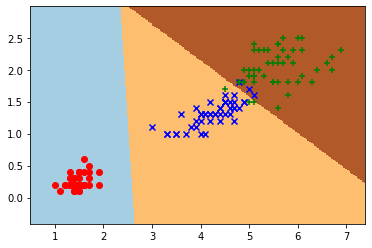

In [76]:
plt.pcolormesh(xx, yy, z, cmap=plt.cm.Paired)

plt.scatter(X[0:50, feature], X[0:50, feature_other], color='red' , marker='o' , label='setosa')
plt.scatter(X[50:100, feature], X[50:100, feature_other] , color='blue' , marker='x' , label='versicolor')
plt.scatter(X[100:150, feature], X[100:150, feature_other] , color='green' , marker='+' , label='Virginica')
